In [134]:
!pip install plotly

You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


In [133]:
import scipy.integrate as integr            
import numpy as np                          
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import pylab
import plotly

colors = ["#00FFFF",                # Azure
          "#0000FF",                # Blue
          "#FF0000",                # Red
          "#00FF00",                # Green
          "#D2691E",                #
          "#AAA662",
          "#9A0EEA",
          "#808000",
          "#FFA500",
          "#9ACD32",
          "#ED0DD9",
          "#FC5A50",
          "#929591",
          "#029386",
          "#C79FEF",
          "#FAC205",
          "#6E750E",
          "#06C2AC",
          "#CD5C5C",                # IndianRed
          "#A52A2A",                # Brown
          "#7B68EE",                # MediumState_blue
          "#4682B4",                # SteelBlue
          "#800000"                # Maroon
          ]
colors = 10*colors

mycolors = [
    '#000000',
    '#696969',
    '#A9A9A9',
    '#C0C0C0',
    '#D3D3D3',
    '#DCDCDC',
]

def mesh(x, y):
    general = []
    for i in range(len(x)):
        for j in range(len(y)):
            local = []
            local.append(x[i])
            local.append(y[j])
            general.append(local)
    return general

stat_dpi = 90
rect_pics = (7, 7)
big_pics = (10, 10)
dynamics_pics = (14, 7)

ModuleNotFoundError: No module named 'plot_ly'

In [2]:
def plotFP(y1, y2, centers = None, starts = None, color = "b"):
    fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)
    plt.plot(y1, y2, c = color)
    if centers is not None:
        for i in centers:
            plt.scatter(i[0], i[1])
    if starts is not None:
        for i in starts:
            plt.scatter(i[0], i[1])
    plt.grid(True)
    plt.show() 

In [3]:
def logistic(t, r, x_0, t_0):
    result = 1/(1 + (1/x_0 - 1) * np.exp(-r*(t-t_0)))
    return result

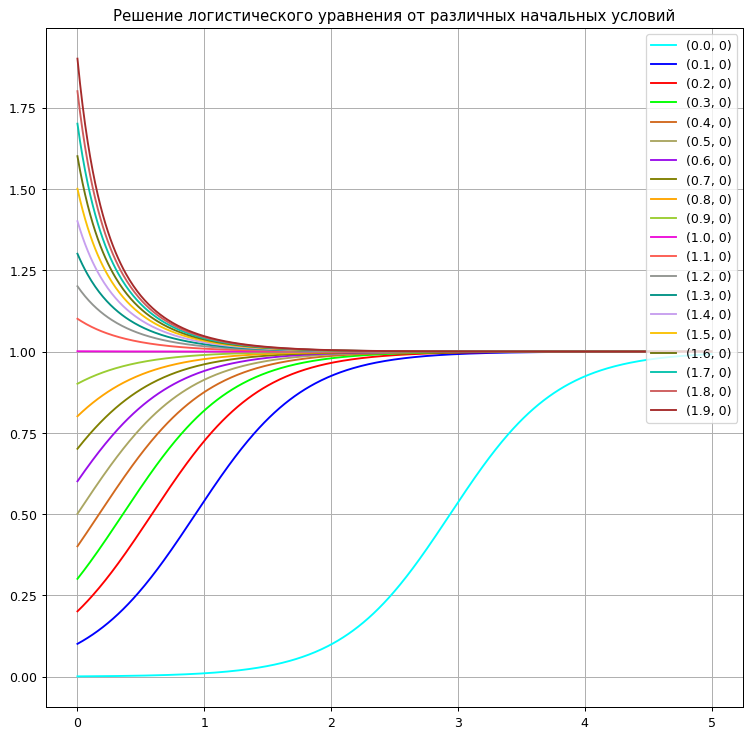

In [4]:
time = np.linspace(0, 5, 500)
#print(y)
#print(time)

fig = plt.figure(facecolor="white", figsize = big_pics, dpi=stat_dpi)
step = 0.1
for i in np.arange(0.001, 2, step):
    plt.plot(time, logistic(time, 2.35, i, 0), c = colors[int(i/step)%30], label = f'({round(i, 2)}, 0)')
plt.title("Решение логистического уравнения от различных начальных условий")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

In [5]:
def discr_sol(x_0, r, times=0):
    X = [x_0]
    for i in range(times-1):
        X.append((1 + r)*X[-1] - r*X[-1]**2)
    return X


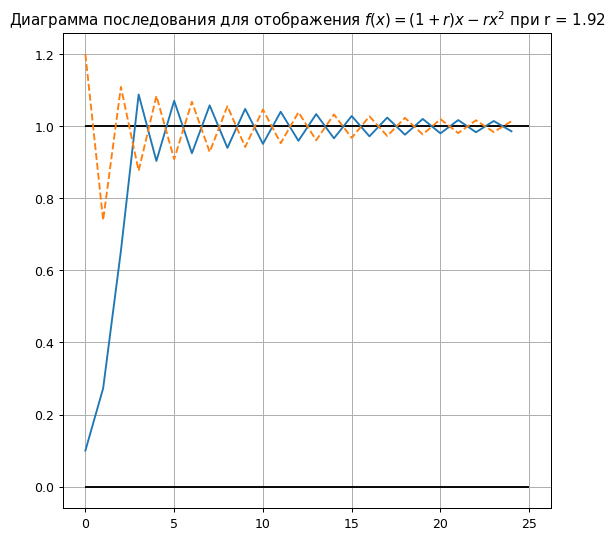

In [6]:
time = np.arange(0, 25)
fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)
r=1.92

plt.hlines(1, 0, len(time), color='black')
plt.hlines(0, 0, len(time), color='black')
plt.plot(discr_sol(0.1, r, len(time)))
plt.plot(discr_sol(1.2, r, len(time)), linestyle='dashed')
plt.title(r"Диаграмма последования для отображения $f(x) = (1+r)x-rx^2$ при r = "+str(r))
plt.grid(True)
plt.show()

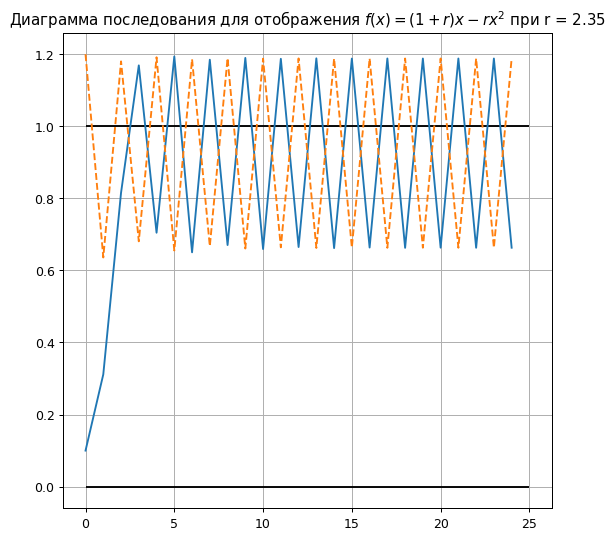

In [7]:
time = np.arange(0, 25)
fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)
r=2.35

plt.hlines(1, 0, len(time), color='black')
plt.hlines(0, 0, len(time), color='black')
plt.plot(discr_sol(0.1, r, len(time)))
plt.plot(discr_sol(1.2, r, len(time)), linestyle='dashed')
plt.title(r"Диаграмма последования для отображения $f(x) = (1+r)x-rx^2$ при r = "+str(r))
plt.grid(True)
plt.show()

In [8]:
def plotANAL(r, x_0, times=50):
    time = np.arange(0, times)
    fig = plt.figure(facecolor="white", figsize = big_pics, dpi=stat_dpi)
    ff = lambda x : (1 + r) * ((1 + r)*x - r*x**2) - r * ((1+r)*x-r*x**2)**2

    plt.hlines(1, 0, len(time), color='black')
    plt.hlines(0, 0, len(time), color='black')

    xp3 = (2*r + r**2 - r*(-4 + r**2)**0.5)/(2*r**2)
    xp4 = (2*r + r**2 + r*(-4 + r**2)**0.5)/(2*r**2)

    plt.hlines(xp3, 0, len(time), color='black')
    plt.hlines(xp4, 0, len(time), color='black')
    
    data = discr_sol(x_0, r, len(time))

    plt.scatter(x=time, y=data)
    plt.plot(time, data, linestyle='dashed')
    plt.plot(np.linspace(0, 50, 1000), logistic(np.linspace(0, 50, 1000), r, x_0, 0))
    plt.title(r"Диграмма последования для режима двукратного цикла при r = "+str(r)+f" и {x_0=}")
    plt.grid(True)
    plt.show()

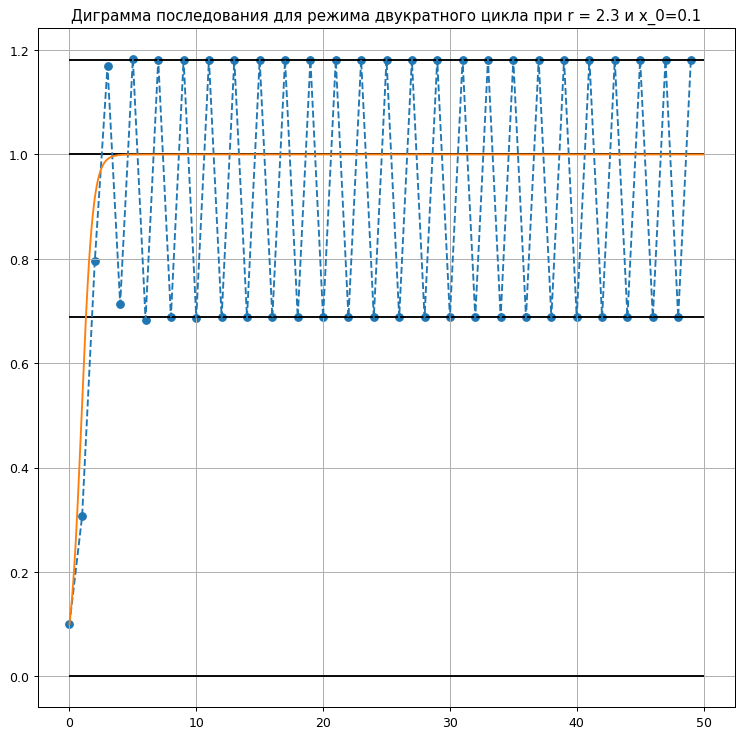

In [9]:
plotANAL(r=2.3, x_0=0.1)

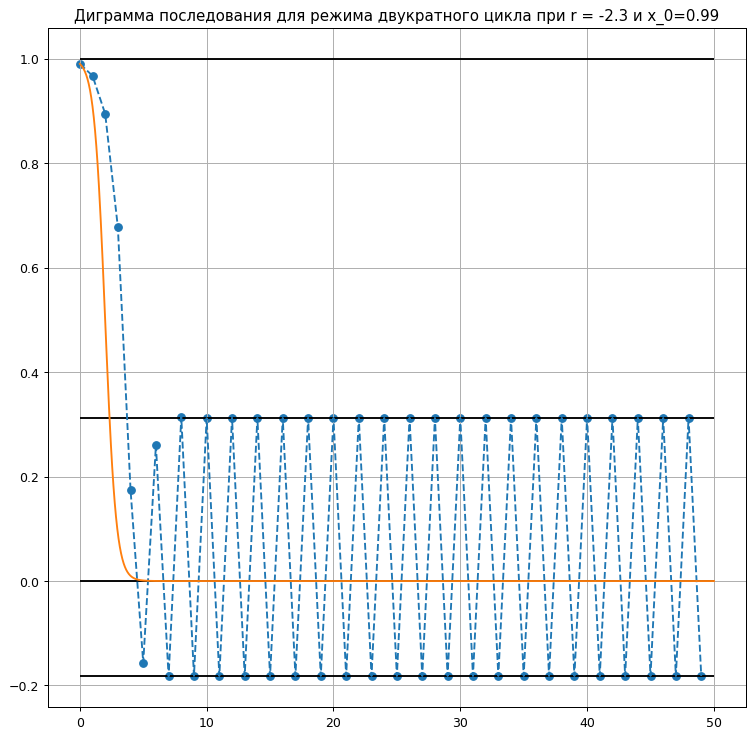

In [10]:
plotANAL(r=-2.3, x_0=0.99)

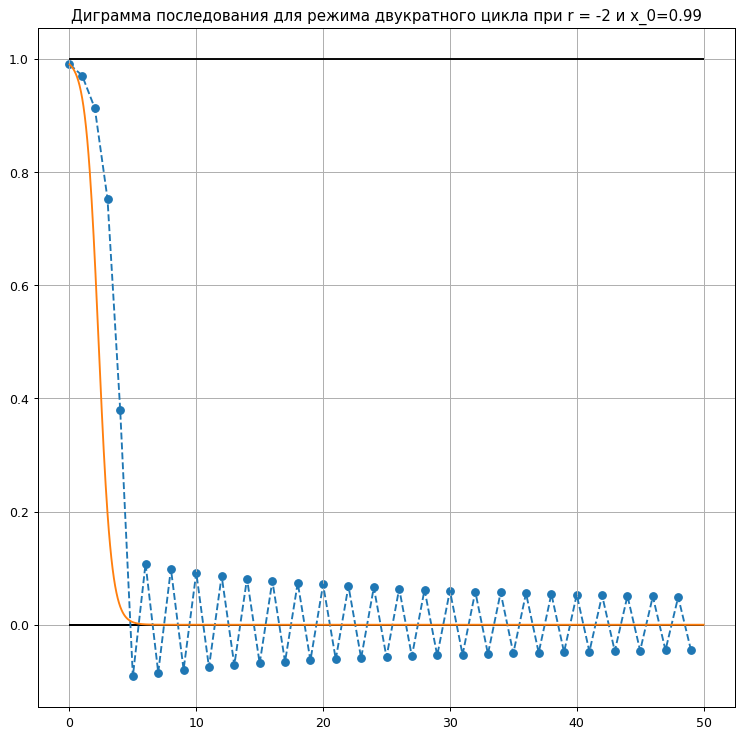

In [11]:
# time = np.arange(0, 100)
# fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)

# r = -2

# plt.hlines(1, 0, len(time), color='black')
# plt.hlines(0, 0, len(time), color='black')

# xp3 = (2*r + r**2 - r*(-4 + r**2)**0.5)/(2*r**2)
# xp4 = (2*r + r**2 + r*(-4 + r**2)**0.5)/(2*r**2)

# #plt.hlines(xp3, 0, len(time), color='black')
# #plt.hlines(xp4, 0, len(time), color='black')

# #plt.plot(discr_sol(0.1, 2.35, len(time)))
# plt.plot(discr_sol(0.1, r, len(time)))
# plt.title(r"Диаграмма последования для отображения $f(x) = (1+r)x-rx^2$ при r = "+str(r))
# plt.grid(True)
# plt.show()
plotANAL(r=-2, x_0=0.99)

In [12]:
def KenLam(times, x_0, r, with_lines = True, with_arrows = True, with_dots=True, with_3cr = False, with_4cr=False, constant_size=False, arrow_c=["green"]):
    f = lambda x : (1 + r)*x - r*x**2
    fig = plt.figure(facecolor="white", figsize = big_pics, dpi=stat_dpi)
    dtime = np.arange(x_0, times)
    X = [x_0]
    Y = [x_0]
    plt.scatter(X, Y)
    
    for i in dtime:
        y = f(X[-1])
        X.append(X[-1])
        Y.append(y)
        X.append(y)
        Y.append(Y[-1])
        
    scale = (max(X)-min(X)) 
    for i in range(1, len(X)):
        if with_arrows:
            plt.arrow(X[i-1], Y[i-1], X[i]-X[i-1],
                  Y[i]-Y[i-1], head_width=0.01*scale, head_length=0.02*scale, 
                      color=arrow_c[i%(len(arrow_c))], width=0.0005*scale, alpha=0.3, length_includes_head=True)
        
        

    time = np.linspace(min(X), max(X))
    if constant_size:
        time = np.linspace(0, (1+r)/r)
    plt.plot(time, f(time))
    if with_arrows:
        plt.plot(time, time)
    if with_3cr:
        plt.plot(time, f(f(time)))
    if with_4cr:
        plt.plot(time, f(f(f(time))), color='yellow')
        
    
    if with_lines:
        plt.plot([X[i] for i in range(len(X)) if i%2==0][:-1], [X[i] for i in range(len(X)) if i%2==0][1:], color="red")
    if with_dots:
        plt.scatter([X[i] for i in range(len(X)) if i%2==0][:-1], [X[i] for i in range(len(X)) if i%2==0][1:], color="red")
    #print([X[i] for i in range(len(X)) if i%2==0])
    plt.title(r"Диаграмма Кёнигса-Ламерея для отображения $f(x) = (1+r)x - rx^2$"+f" при {x_0=},  {r=}")
    plt.grid(True)
    plt.show()
    
    
    

    

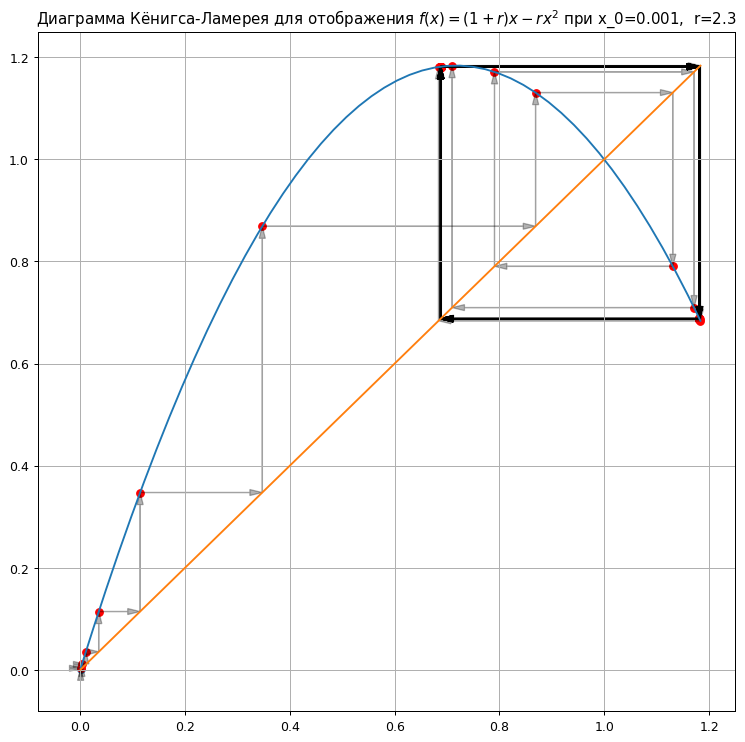

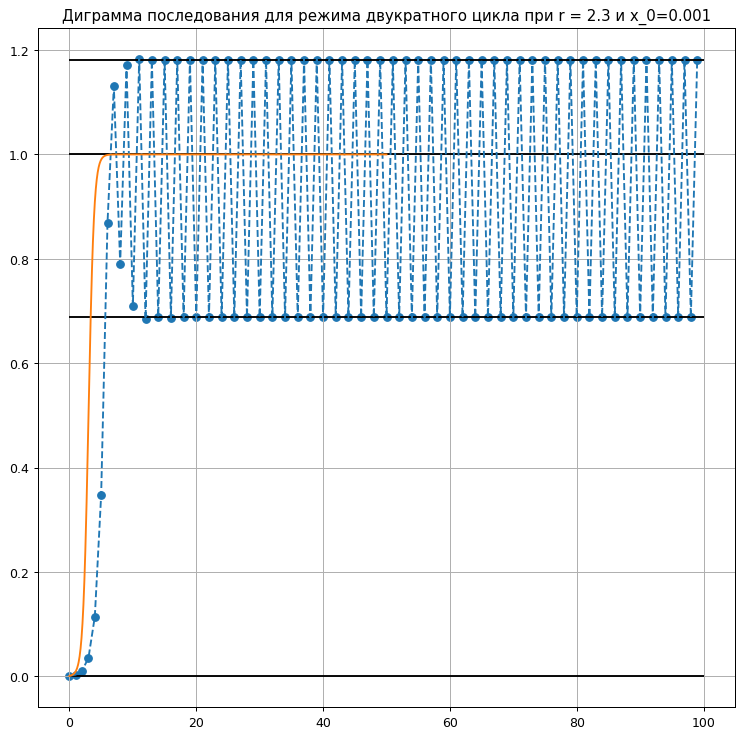

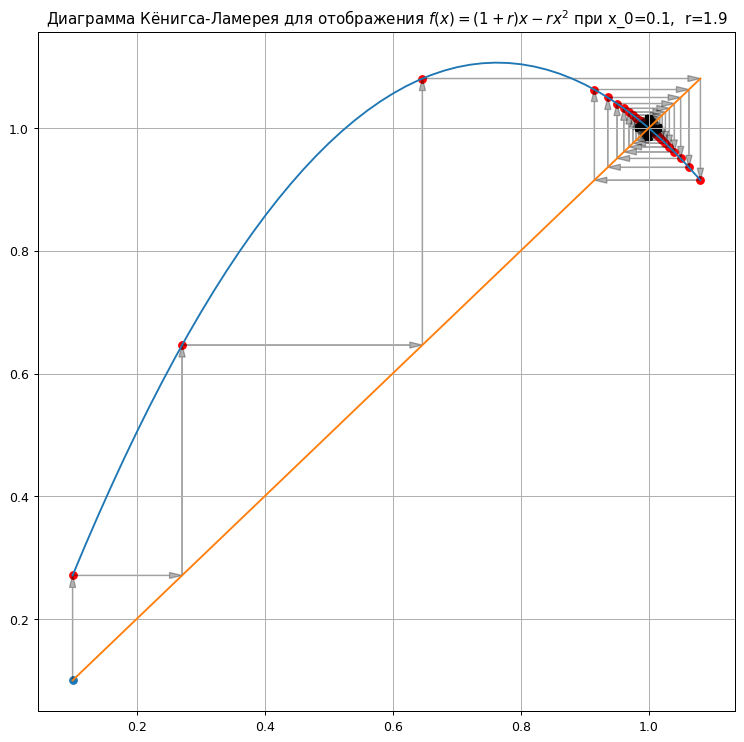

c:\program files\python39\lib\site-packages\numpy\ma\core.py:3379: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
c:\program files\python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


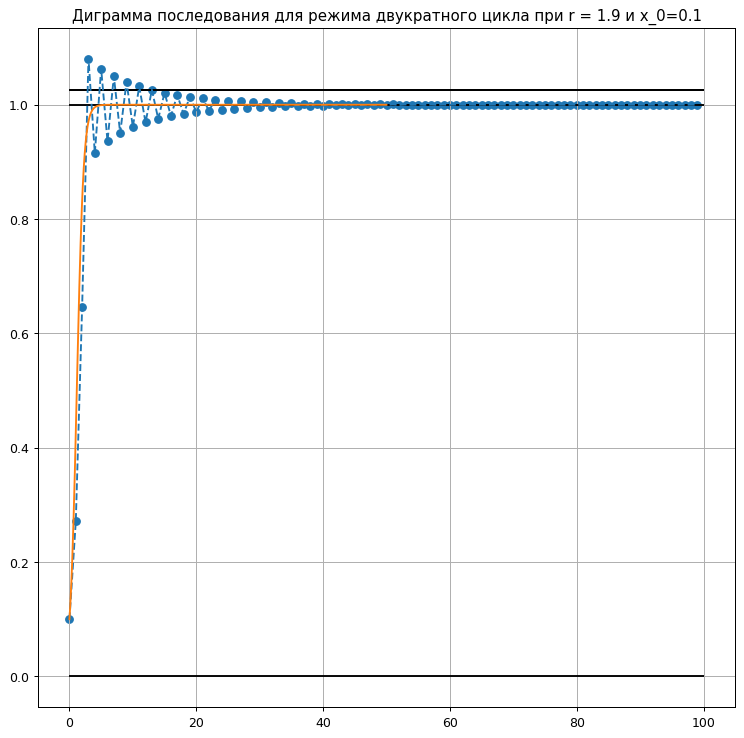

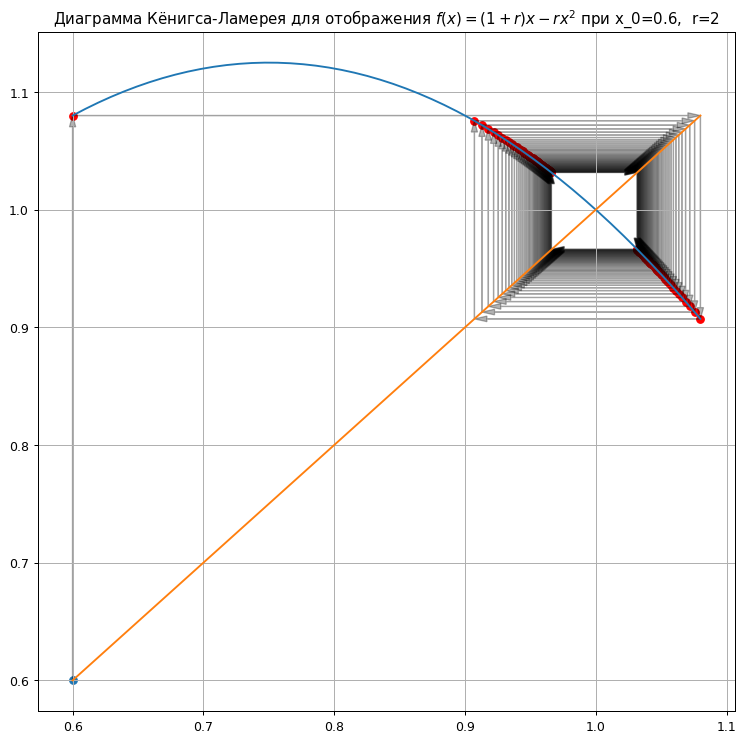

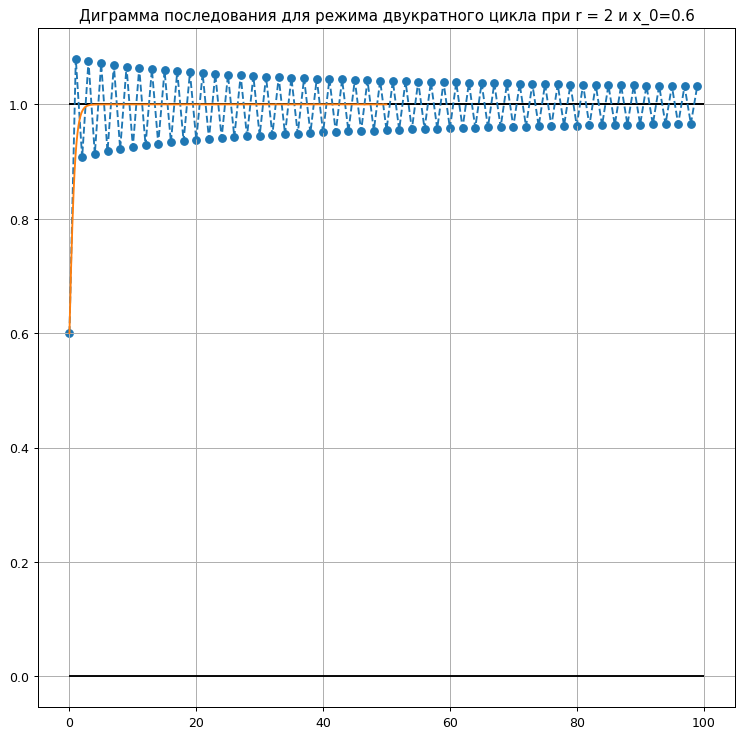

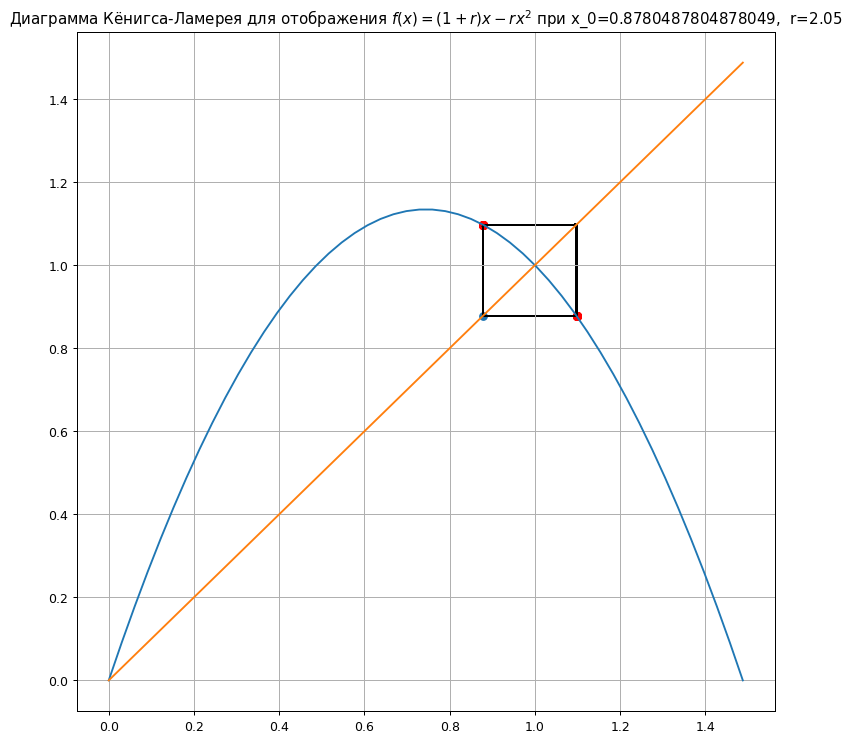

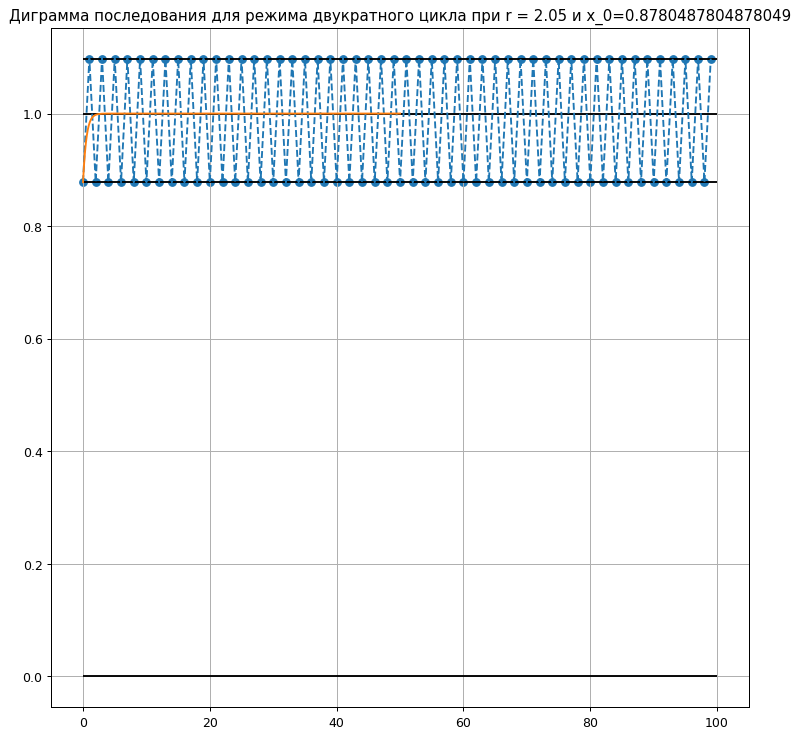

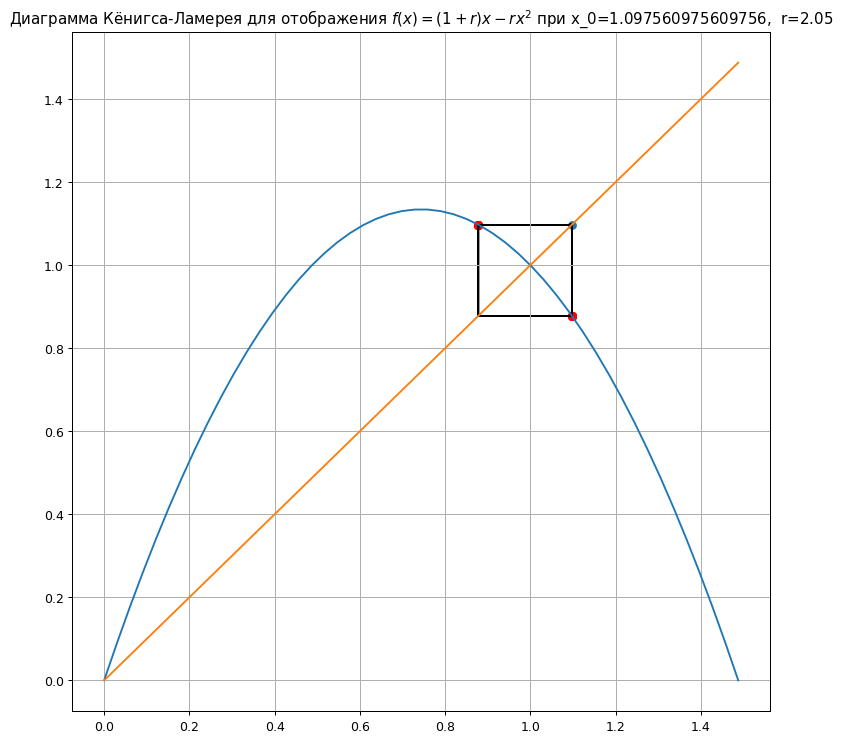

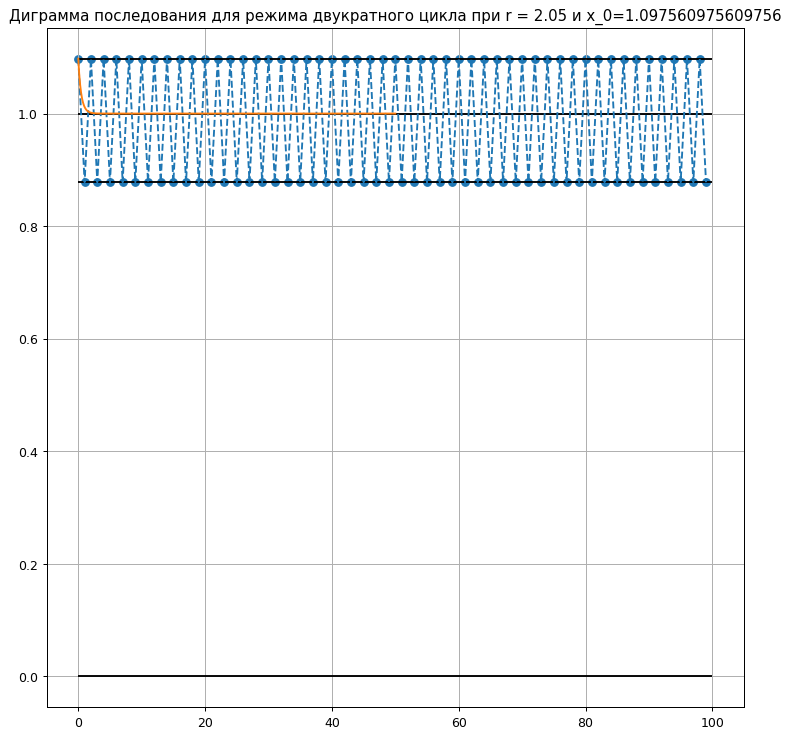

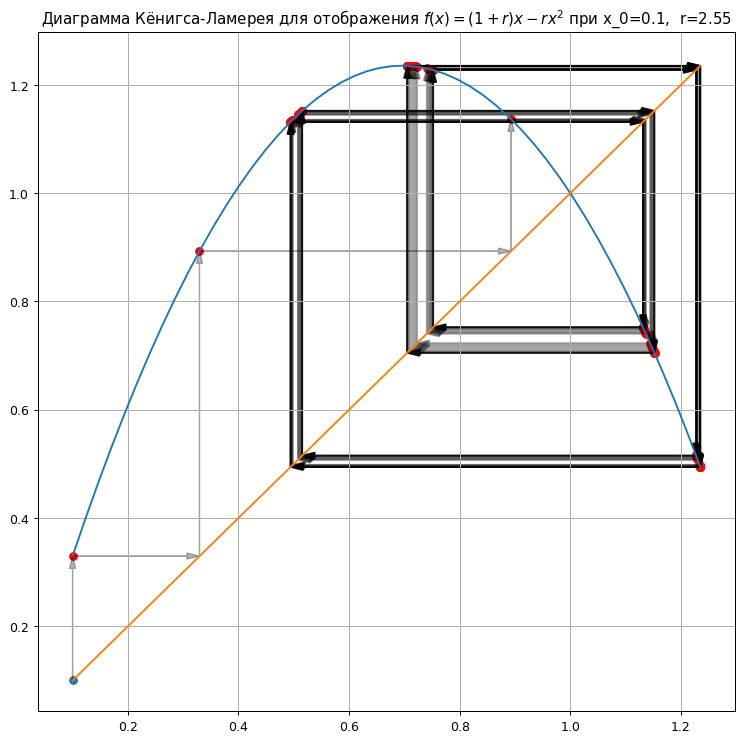

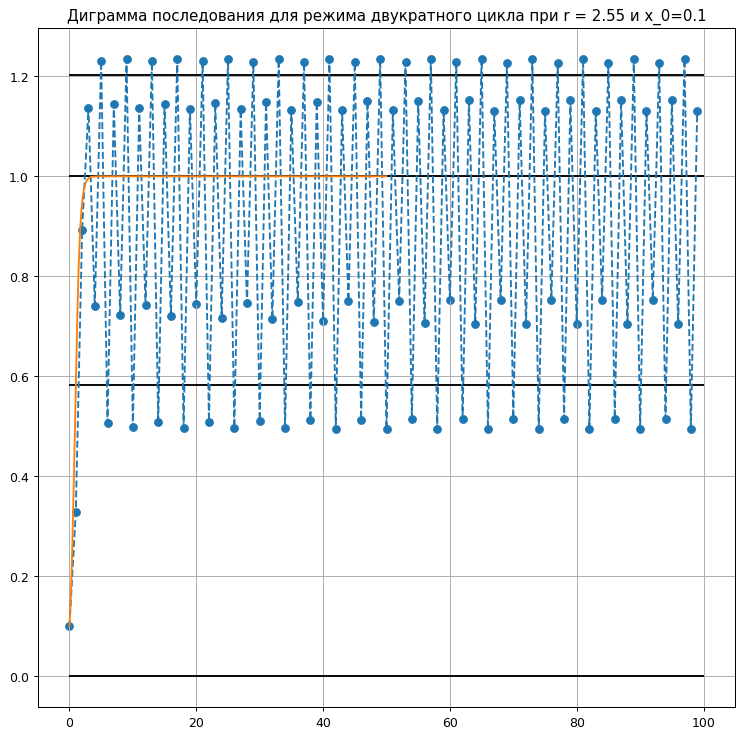

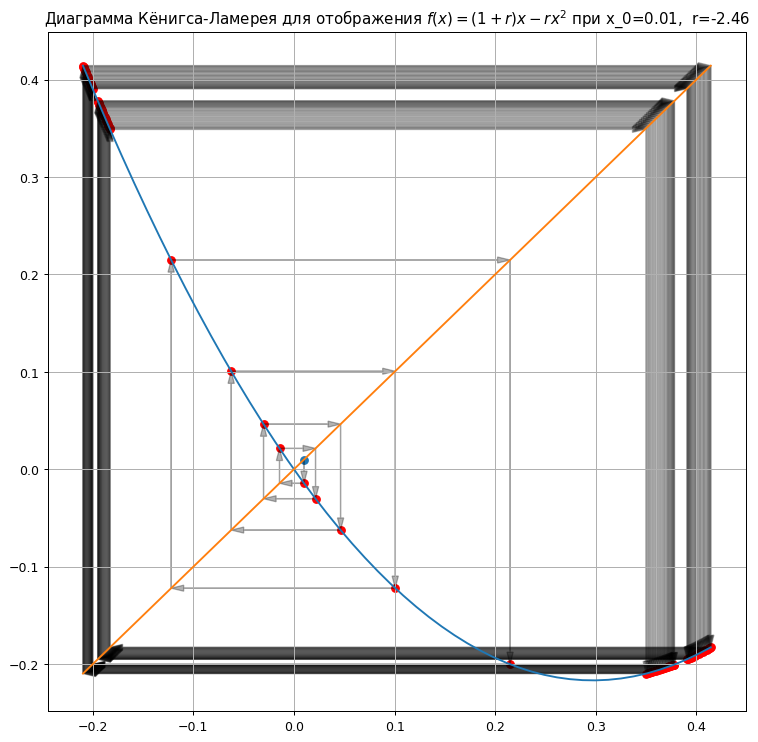

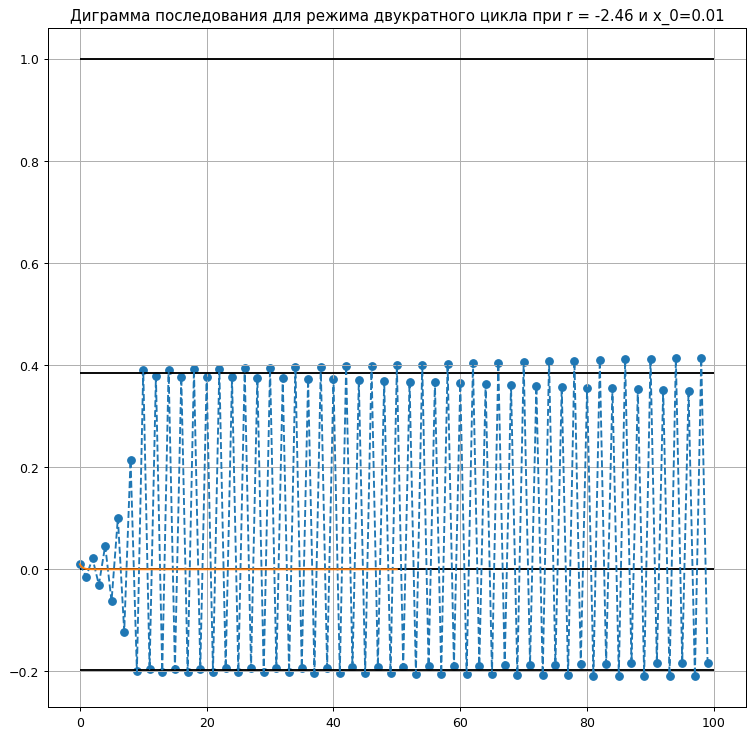

In [13]:
def analyze(configs):
    for i in configs:
        KenLam(i['times'], i['x_0'], i['r'], with_arrows=i['with_arrows'], with_dots=i['with_dots'], constant_size=i['constant_size'],
               with_3cr=i['with_3cr'], with_4cr=i['with_4cr'], arrow_c=i['arrow_colors'], with_lines=i['with_lines'])
        plotANAL(i['r'], i['x_0'], i['times'])

def calculateStable(r):
    return (2*r + r**2 - r*(-4 + r**2)**0.5)/(2*r**2), (2*r + r**2 + r*(-4 + r**2)**0.5)/(2*r**2)

configs=[
    {
        'times': 100,
        'x_0': 0.001,
        'r': 2.3,
        'with_arrows': True,
        'with_dots': True,
        'with_3cr': False,
        'with_4cr': False,
        'arrow_colors': ['black'],
        'with_lines': False,
        'constant_size': False
    },
    {
        'times': 100,
        'x_0': 0.1,
        'r': 1.9,
        'with_arrows': True,
        'with_dots': True,
        'with_3cr': False,
        'with_4cr': False,
        'arrow_colors': ['black'],
        'with_lines': False,
        'constant_size': False
    },
    {
        'times': 100,
        'x_0': 0.6,
        'r': 2,
        'with_arrows': True,
        'with_dots': True,
        'with_3cr': False,
        'with_4cr': False,
        'arrow_colors': ['black'],
        'with_lines': False,
        'constant_size': False
    },
    {
        'times': 100,
        'x_0': calculateStable(2.05)[0],
        'r': 2.05,
        'with_arrows': True,
        'with_dots': True,
        'with_3cr': False,
        'with_4cr': False,
        'arrow_colors': ['black'],
        'with_lines': False,
        'constant_size': True
    },
    {
        'times': 100,
        'x_0': calculateStable(2.05)[1],
        'r': 2.05,
        'with_arrows': True,
        'with_dots': True,
        'with_3cr': False,
        'with_4cr': False,
        'arrow_colors': ['black'],
        'with_lines': False,
        'constant_size': True
    },
    {
        'times': 100,
        'x_0': 0.1,
        'r': 2.55,
        'with_arrows': True,
        'with_dots': True,
        'with_3cr': False,
        'with_4cr': False,
        'arrow_colors': ['black'],
        'with_lines': False,
        'constant_size': False
    },
    {
        'times': 100,
        'x_0': 0.01,
        'r': -2.46,
        'with_arrows': True,
        'with_dots': True,
        'with_3cr': False,
        'with_4cr': False,
        'arrow_colors': ['black'],
        'with_lines': False,
        'constant_size': False
    }
]


analyze(configs)

# KenLam(500, 0.001, -2.3, with_arrows=True, with_3cr=False, with_4cr=True, arrow_c=['black'], with_lines=False)
# KenLam(500, 0.1, 1.9, with_arrows=True, with_3cr=False, with_4cr=True, arrow_c=['black'], with_lines=False)

# r = 2
# x=(2*r + r**2 - r*(-4 + r**2)**0.5)/(2*r**2)
# KenLam(100, x, r, with_arrows=True, with_3cr=True, constant_size=True, arrow_c=['black'])
# x = (2*r + r**2 + r*(-4 + r**2)**0.5)/(2*r**2)
# KenLam(100, x, r, with_arrows=True, with_3cr=True, constant_size=True, arrow_c=['black'])

# r = 2.05
# x=(2*r + r**2 - r*(-4 + r**2)**0.5)/(2*r**2)
# KenLam(100, x, r, with_arrows=True, with_3cr=True, constant_size=True, arrow_c=['black'])
# x = (2*r + r**2 + r*(-4 + r**2)**0.5)/(2*r**2)
# KenLam(100, x, r, with_arrows=True, with_3cr=True, constant_size=True, arrow_c=['black'])

# KenLam(100, 0.1, 2.1, with_arrows=True, with_3cr=True, constant_size=True, arrow_c=['black'], with_lines=False)
# KenLam(100, 0.1, 2.3, with_arrows=True, with_3cr=True, constant_size=True, arrow_c=['black'], with_lines=False)
# KenLam(100, 0.1, 2.45, with_arrows=True, with_3cr=True, constant_size=True, arrow_c=['black'], with_lines=False)
# KenLam(500, 0.1, 2.5, with_arrows=True, with_3cr=False, with_4cr=True, arrow_c=['black'], with_lines=False)
# KenLam(500, 0.1, 2.55, with_arrows=True, with_3cr=False, with_4cr=True, arrow_c=['black'], with_lines=False)
# KenLam(500, 0.1, 2.57, with_arrows=True, with_3cr=False, with_4cr=True, arrow_c=['black'], with_lines=False)
# KenLam(1000, 0.01, -2.46, with_arrows=True, with_3cr=False, with_4cr=True, arrow_c=['black'], with_lines=False)




## Пример зависимости от начальных условий

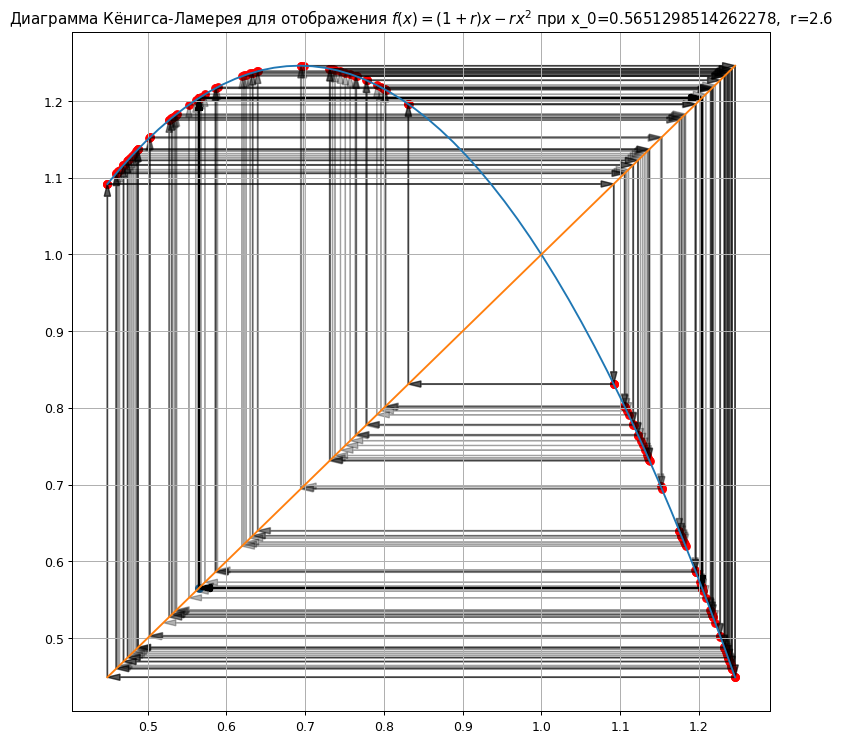

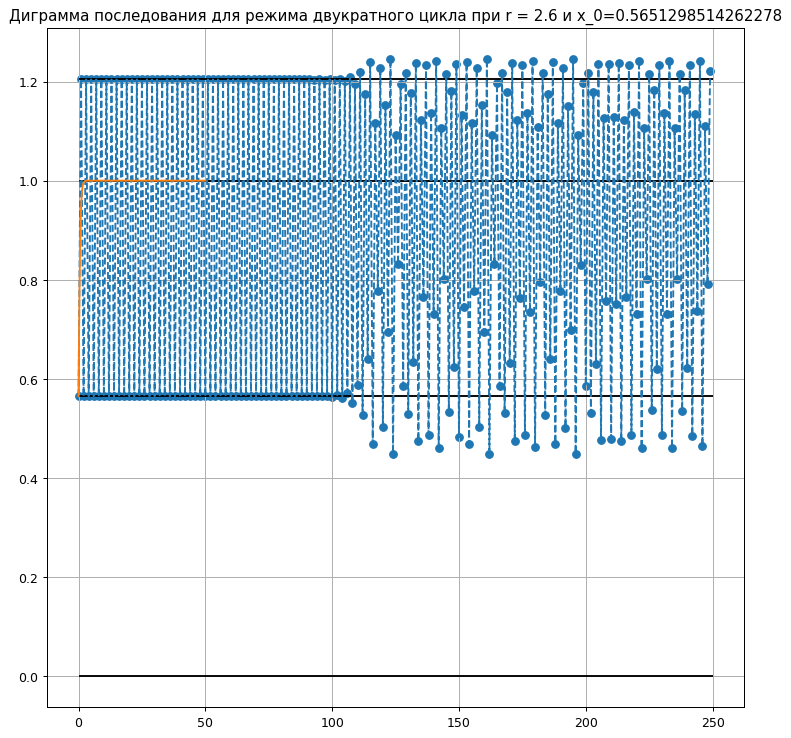

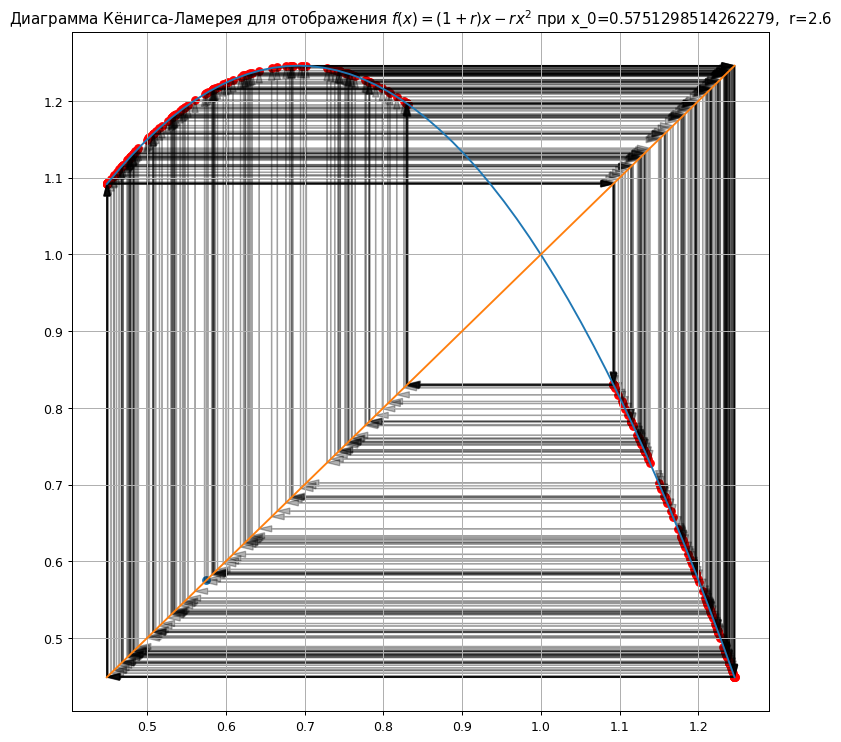

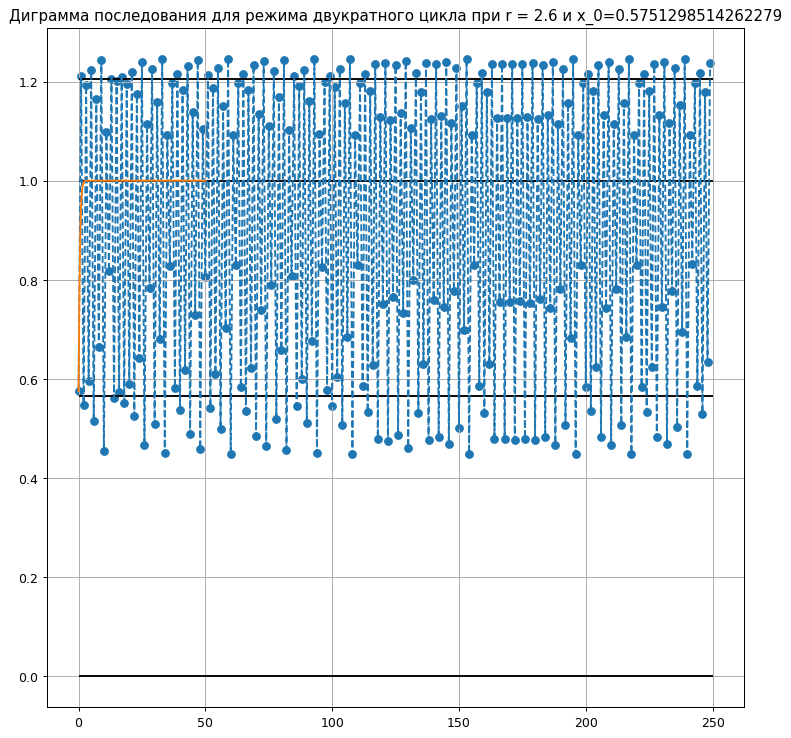

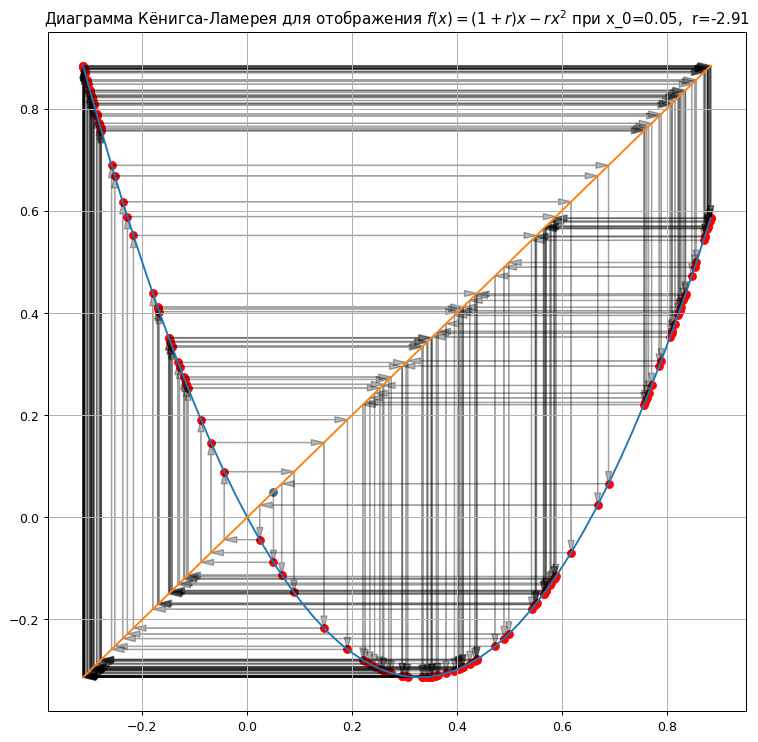

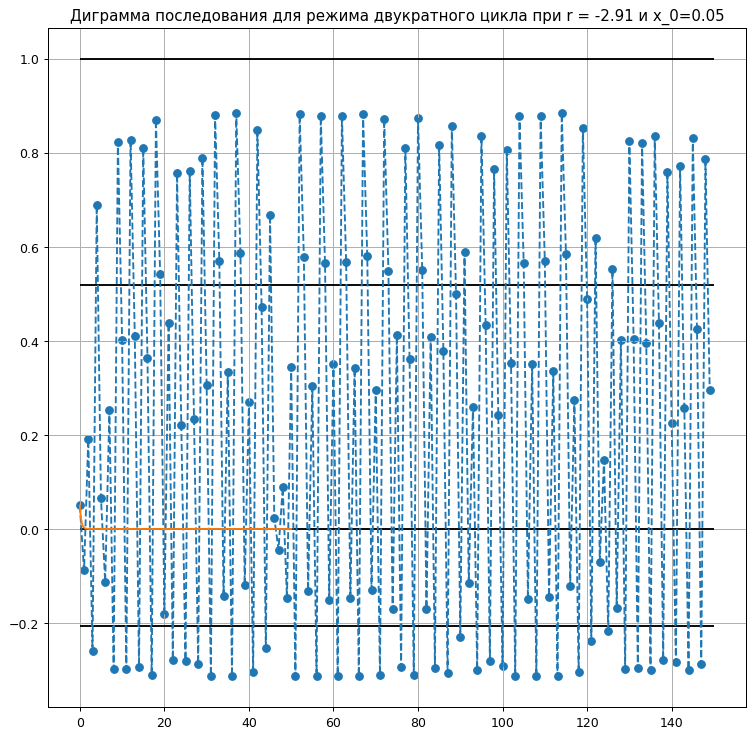

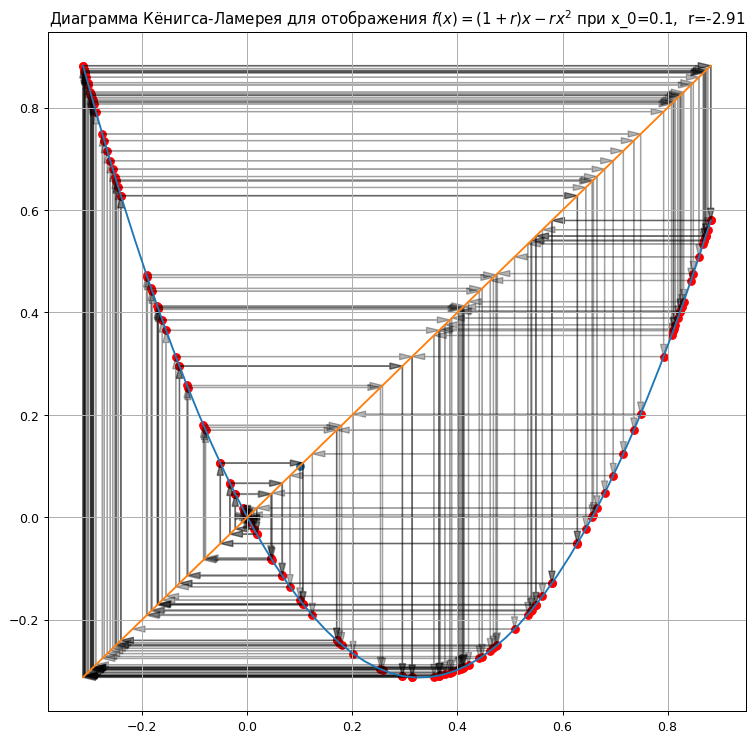

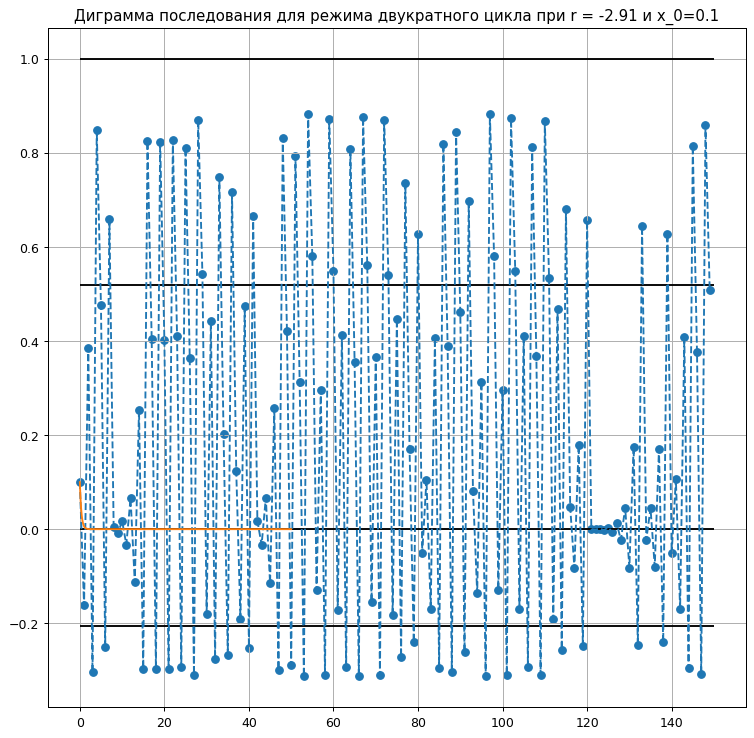

In [14]:
config2=[
    {
        'times': 250,
        'x_0': calculateStable(2.6)[0],
        'r': 2.6,
        'with_arrows': True,
        'with_dots': True,
        'with_3cr': False,
        'with_4cr': False,
        'arrow_colors': ['black'],
        'with_lines': False,
        'constant_size': False
    },
    {
        'times': 250,
        'x_0': calculateStable(2.6)[0]+0.01,
        'r': 2.6,
        'with_arrows': True,
        'with_dots': True,
        'with_3cr': False,
        'with_4cr': False,
        'arrow_colors': ['black'],
        'with_lines': False,
        'constant_size': False
    },
    {
        'times': 150,
        'x_0': 0.05,
        'r': -2.91,
        'with_arrows': True,
        'with_dots': True,
        'with_3cr': False,
        'with_4cr': False,
        'arrow_colors': ['black'],
        'with_lines': False,
        'constant_size': False
    },
    {
        'times': 150,
        'x_0': 0.1,
        'r': -2.91,
        'with_arrows': True,
        'with_dots': True,
        'with_3cr': False,
        'with_4cr': False,
        'arrow_colors': ['black'],
        'with_lines': False,
        'constant_size': False
    }
]

analyze(config2)

In [403]:
def FTree(f=lambda x,r: r*x*(1-x), x_0=0.7, r_range = (2, 4), delta = 0.001, qual=200,
          r_lines = True, x_lines = [True, True, True, True]):
    fig = plt.figure(facecolor="white", figsize = big_pics, dpi=stat_dpi)
    x00 = x_0
    
    y_p = []
    x_p = []
    r_p = {}
    
    for r in np.arange(r_range[0], r_range[1], delta):
        x = x_0
        r_p[r] = []
        for j in range(qual):
            x = f(x, r)
            #x_p.append(r)
            #y_p.append(x)
            r_p[r].append(x)
        x_0 = x
        
    for i in r_p:
        n = len(r_p[i])
        plt.plot([i]*n, r_p[i], 'r+', ms=1, alpha=0.1, rasterized=True)
    
    r_bif = [0]*4
    x_bif = {}
    eps=0.0001
    for i in r_p:
        t = r_p[i]
        
        if np.std(t[-20:])<eps:
            #print(f"r = {i}, один цикл")
            r_bif[0]=i
            x_bif[1]=t[-1]
        elif np.std(t[-20::2])+np.std(t[-19::2])<eps:
            #print(f"r = {i}, два цикла")
            r_bif[1]=i
            x_bif[2]=t[-2:]
        elif np.std(t[-20::4])+np.std(t[-18::4])<eps:
            #print(f"r = {i}, четыре цикла")
            r_bif[2]=i
            x_bif[4]=t[-4:]
        elif np.std(t[-20::8])+np.std(t[-16::8])<eps:
            #print(f"r = {i}, восемь циклов")
            r_bif[3]=i
            x_bif[8]=t[-8:]
    print(f"r bifurcational values = {r_bif}")
    print(f"x bifurcational values:")
    x_bif[1]=[x_bif[1]]
    for i in x_bif:
        print(f"При кратности цикла {i}: {[round(j, 2) for j in x_bif[i]]}")
        
    if r_lines:
        plt.vlines(r_bif, 0, 1)
    if x_lines[0]:
        plt.hlines(list(x_bif.values())[0], r_range[0], r_range[1], color='#990066')
    if x_lines[1]:
        plt.hlines(list(x_bif.values())[1], r_range[0], r_range[1], color='#79553D')
    if x_lines[2]:
        plt.hlines(list(x_bif.values())[2], r_range[0], r_range[1], color='#003153')
    if x_lines[3]:
        plt.hlines(list(x_bif.values())[3], r_range[0], r_range[1], color='#89AC76')
        
    print("Подсчет констант")
    print(f"beta = {(r_bif[1]-r_bif[0])/(r_bif[2]-r_bif[1])}")
    print(f"beta = {(r_bif[2]-r_bif[1])/(r_bif[3]-r_bif[2])}")
    
    #print(f"alpha = {min(x_bif[1]) / min(x_bif[2])}")
    #print(f"alpha = {min(x_bif[2]) / min(x_bif[4])}")
    #print(f"alpha = {min(x_bif[4]) / min(x_bif[8])}")
    
        
        
    plt.title(f"Дерево Фегенбаума при x_0={round(x00, 2)}, {r_range=}, {delta=}, {qual=}")
        
    #plt.plot(x_p, y_p, '+', ms=1, alpha=0.1, rasterized=True)
    #plt.title(f"Дерево Фегенбаума при x_0={round(x00, 2)}, {r_range=}, {delta=}, {qual=}")
    
    plt.show()
    







        

r bifurcational values = [2.9919999999998907, 3.442999999999841, 3.54199999999983, 3.562999999999828]
x bifurcational values:
При кратности цикла 1: [0.67]
При кратности цикла 2: [0.85, 0.44]
При кратности цикла 4: [0.88, 0.36, 0.82, 0.52]
При кратности цикла 8: [0.88, 0.37, 0.83, 0.49, 0.89, 0.35, 0.81, 0.55]
Подсчет констант
beta = 4.555555555555555
beta = 4.714285714285714


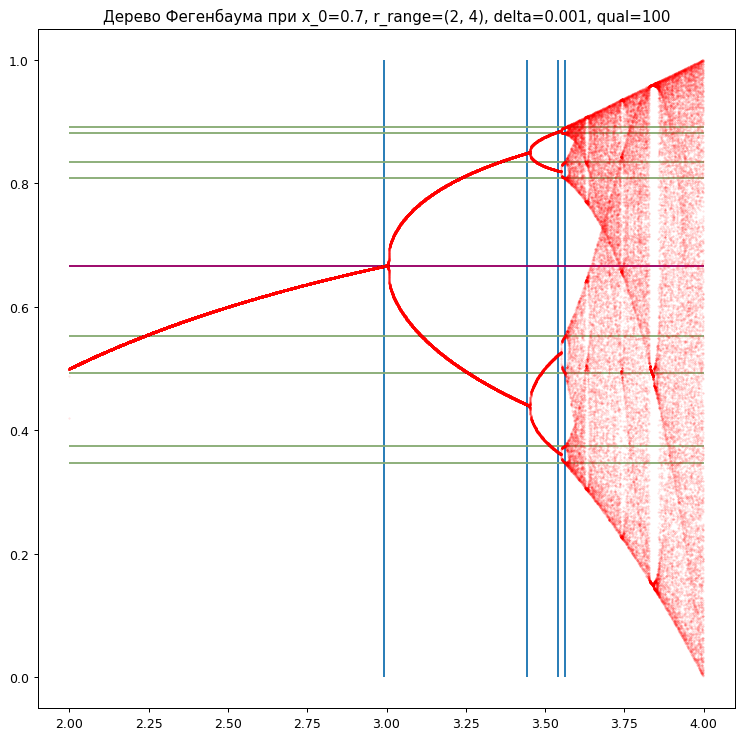

In [404]:
FTree(qual=100, r_range=(2, 4), delta=0.001, x_lines=[True, False, False, True])

In [522]:
def FTree(f=lambda x,r: 1-r*x**4, x_0=0.7, r_range = (0, 2), delta = 0.001, qual=200,
          r_lines = False, x_lines=[False, False, False, False], eps=0.001):
    fig = plt.figure(facecolor="white", figsize = big_pics, dpi=stat_dpi)
    x00 = x_0
    
    y_p = []
    x_p = []
    r_p = {}
    
    for r in np.arange(r_range[0], r_range[1], delta):
        x = x_0
        r_p[r] = []
        for j in range(qual):
            x = f(x, r)
            #print(x)
            #x_p.append(r)
            #y_p.append(x)
            r_p[r].append(x)
        x_0 = x
    fig = px.scatter()
        
    for i in r_p:
        n = len(r_p[i])
        plt.plot([i]*n, r_p[i], 'r+', ms=1, alpha=0.1, rasterized=True)
        
    
    r_bif = [0]*4
    x_bif = {}
    for i in r_p:
        t = r_p[i]
        
        if np.std(t[-20:])<eps:
            #print(f"r = {i}, один цикл")
            r_bif[0]=i
            x_bif[1]=t[-1]
        elif np.std(t[-20::2])+np.std(t[-19::2])<eps:
            #print(f"r = {i}, два цикла")
            r_bif[1]=i
            x_bif[2]=t[-2:]
        elif np.std(t[-20::4])+np.std(t[-18::4])<eps:
            #print(f"r = {i}, четыре цикла")
            r_bif[2]=i
            x_bif[4]=t[-4:]
        elif np.std(t[-20::8])+np.std(t[-16::8])<eps:
            #print(f"r = {i}, восемь циклов")
            r_bif[3]=i
            x_bif[8]=t[-8:]
    print(f"r bifurcational values = {r_bif}")
    print(f"x bifurcational values:")
    x_bif[1]=[x_bif[1]]
    for i in x_bif:
        print(f"При кратности цикла {i}: {[round(j, 2) for j in x_bif[i]]}")
        
    if r_lines:
        plt.vlines(r_bif, -1, 1.5)
    if x_lines[0]:
        plt.hlines(list(x_bif.values())[0], r_range[0], r_range[1], color='#990066')
    if x_lines[1]:
        plt.hlines(list(x_bif.values())[1], r_range[0], r_range[1], color='#79553D')
    if x_lines[2]:
        plt.hlines(list(x_bif.values())[2], r_range[0], r_range[1], color='#003153')
    if x_lines[3]:
        plt.hlines(list(x_bif.values())[3], r_range[0], r_range[1], color='#89AC76')
        
    plt.vlines(1.57, -1, 1.5)
    print("Подсчет констант")
    #print(f"beta = {(r_bif[1]-r_bif[0])/(r_bif[2]-r_bif[1])}")
    #print(f"beta = {(r_bif[2]-r_bif[1])/(r_bif[3]-r_bif[2])}")
    
    #print(f"alpha = {min(x_bif[1]) / min(x_bif[2])}")
    #print(f"alpha = {min(x_bif[2]) / min(x_bif[4])}")
    #print(f"alpha = {min(x_bif[4]) / min(x_bif[8])}")
    
    print((r_bif[1]-r_bif[0])/(1.57-r_bif[1]))   
        
    plt.title(f"Дерево Фегенбаума при x_0={round(x00, 2)}, {r_range=}, {delta=}, {qual=}")
        
    #plt.plot(x_p, y_p, '+', ms=1, alpha=0.1, rasterized=True)
    #plt.title(f"Дерево Фегенбаума при x_0={round(x00, 2)}, {r_range=}, {delta=}, {qual=}")
    
    plt.show()
    






        

r bifurcational values = [0.489, 1.403, 1.984, 1.985]
x bifurcational values:
При кратности цикла 1: [0.8]
При кратности цикла 2: [-0.32, 0.99]
При кратности цикла 4: [1.0, -0.98, -0.86, -0.07]
При кратности цикла 8: [1.0, -0.98, -0.87, -0.13, 1.0, -0.98, -0.84, 0.03]
Подсчет констант
5.473053892215568


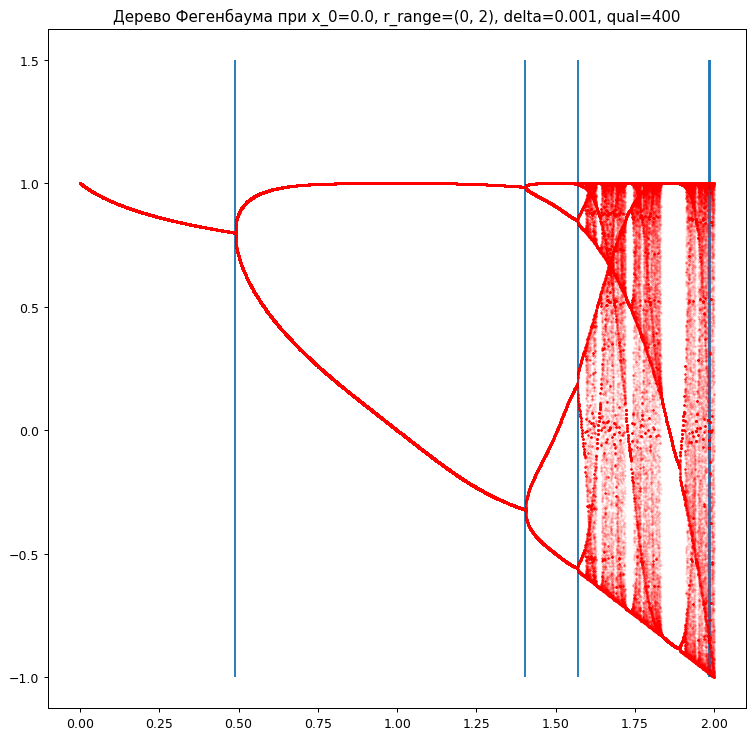

In [523]:
FTree(qual=400,  delta=0.001, r_lines=True, eps=0.001, x_0=0.001)